In [206]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from discountrx_analysis_helper import min_within_group, max_within_group, store_type_color_palette
%load_ext autoreload
%autoreload 2
sns.set(rc={'figure.figsize':(14,10)})
store_types=pd.read_csv('../data/store_type_grx.csv')
site1=pd.read_csv('./GDiscountrxClean.csv')
site2=df=pd.read_csv('./W1Discountrx_Selenium2_Clean.csv')
site3=pd.read_csv('./W2Discountrx_Selenium2_Clean.csv')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
# merge website 1 data with prescription and store type data for analysis
site1=pd.merge(site1,store_types)
prescriptions=pd.read_csv('../web scraping/discount_meds/discount_meds/clincalcg.csv')
prescriptions.columns=["Prescription Rank","Drug name","Drug Popularity"]
site1["Drug name"]=site1["Drug name"].str.strip()
prescriptions["Drug name"]=prescriptions["Drug name"].str.strip()
prescriptions["Drug Popularity"]=prescriptions["Drug Popularity"].str.replace(",","").astype(int)
site1=pd.merge(site1,prescriptions)

# merge website 2 data with prescription and store type data for analysis
site2['Pharmacy']=site2['Pharmacy'].str.strip()
site2=pd.merge(site2,store_types)
prescriptions2=pd.read_csv('../web scraping/discount_meds/discount_meds/clincalcw1.csv')
prescriptions2.columns=["Prescription Rank","Drug name","Drug Popularity"]
site2["Drug name"]=site2["Drug name"].str.strip()
prescriptions2["Drug name"]=prescriptions2["Drug name"].str.strip()
prescriptions2["Drug Popularity"]=prescriptions2["Drug Popularity"].str.replace(",","").astype(int)
site2=pd.merge(site2,prescriptions2)

# merge website 3 data with prescription and store type data for analysis
site3['Pharmacy']=site3['Pharmacy'].str.strip()
site3=pd.merge(site3,store_types)
site3.columns = site3.columns.str.replace('Drug Name','Drug name')
prescriptions3=pd.read_csv('../web scraping/discount_meds/discount_meds/clincalc_with_dash.csv')
prescriptions3.columns=["Prescription Rank","Drug name","Drug Popularity"]
site3["Drug name"]=site3["Drug name"].str.strip()
prescriptions3["Drug name"]=prescriptions3["Drug name"].str.replace("-"," ").str.replace("HCL","Hcl").str.replace("ER","Er").str.strip()
prescriptions3["Drug Popularity"]=prescriptions3["Drug Popularity"].str.replace(",","").astype(int)
site3=pd.merge(site3,prescriptions3)
site3.head()

,Drug URL,Drug name,Pharmacy,Price,Store Type,Prescription Rank,Drug Popularity
0,https://werx.org/price/ATORVASTATIN-CALCIUM/15217,Atorvastatin Calcium,Giant Eagle Pharmacy,8.45,Local Pharmacy,0,112474023
1,https://werx.org/price/ATORVASTATIN-CALCIUM/15217,Atorvastatin Calcium,Rite Aid Pharmacy,18.66,Pharmacy Chain,0,112474023
2,https://werx.org/price/ATORVASTATIN-CALCIUM/15217,Atorvastatin Calcium,CVS Pharmacy,18.78,Pharmacy Chain,0,112474023
3,https://werx.org/price/ATORVASTATIN-CALCIUM/15217,Atorvastatin Calcium,Schiller's Pharmacy,9.64,Local Pharmacy,0,112474023
4,https://werx.org/price/ATORVASTATIN-CALCIUM/15217,Atorvastatin Calcium,Target,18.78,Department Store,0,112474023


In [150]:
# merge all three websites into one data frame and keep needed columns
site1['Web Site']="Site 1"
site2['Web Site']="Site 2"
site3['Web Site']="Site 3"
sites=[site1,site2,site3]
allSites = pd.concat(sites)
allSites=allSites[["Drug name","Price", "Drug Popularity", "Store Type", "Web Site"]]

,Drug name,Price,Drug Popularity,Store Type,Web Site
20,Lisinopril,9.21,97608879,Local Pharmacy,Site 1
21,Lisinopril,6.31,97608879,Grocery Chain,Site 1
22,Lisinopril,11.97,97608879,Pharmacy Chain,Site 1
23,Lisinopril,15.98,97608879,Pharmacy Chain,Site 1
24,Lisinopril,14.10,97608879,Department Store,Site 1
25,Lisinopril,5.97,97608879,Grocery Chain,Site 1
26,Lisinopril,10.34,97608879,Pharmacy Chain,Site 1
27,Lisinopril,5.99,97608879,Local Pharmacy,Site 1
28,Lisinopril,8.99,97608879,Wholesale,Site 1
29,Lisinopril,4.00,97608879,Department Store,Site 1


In [155]:
site1.sort_values("Price",ascending=False).head(100)

,Drug name,Drug type,Drug form,Dosage,Count,Pharmacy,Price,Store Type,Prescription Rank,Drug Popularity,Web Site
791,Saxenda,brand,carton,five 3ml pens of 3mg/0.5ml,1 carton,Target (CVS),1414.19,Department Store,142,4771233,Site 1
789,Saxenda,brand,carton,five 3ml pens of 3mg/0.5ml,1 carton,CVS Pharmacy,1414.19,Pharmacy Chain,142,4771233,Site 1
790,Saxenda,brand,carton,five 3ml pens of 3mg/0.5ml,1 carton,Walgreens,1408.28,Pharmacy Chain,142,4771233,Site 1
796,Saxenda,brand,carton,five 3ml pens of 3mg/0.5ml,1 carton,Walmart,1406.85,Department Store,142,4771233,Site 1
793,Saxenda,brand,carton,five 3ml pens of 3mg/0.5ml,1 carton,Rite Aid,1396.88,Pharmacy Chain,142,4771233,Site 1
...,...,...,...,...,...,...,...,...,...,...,...
1367,Clopidogrel,generic,tablet,75mg,30 tablets,Walgreens,59.29,Pharmacy Chain,38,20016095,Site 1
1338,Duloxetine,generic,capsule,60mg,30 capsules,Walgreens,58.28,Pharmacy Chain,35,21217653,Site 1
643,Celecoxib,generic,capsule,200mg,30 capsules,Target (CVS),57.84,Department Store,125,5445346,Site 1
641,Celecoxib,generic,capsule,200mg,30 capsules,CVS Pharmacy,57.84,Pharmacy Chain,125,5445346,Site 1


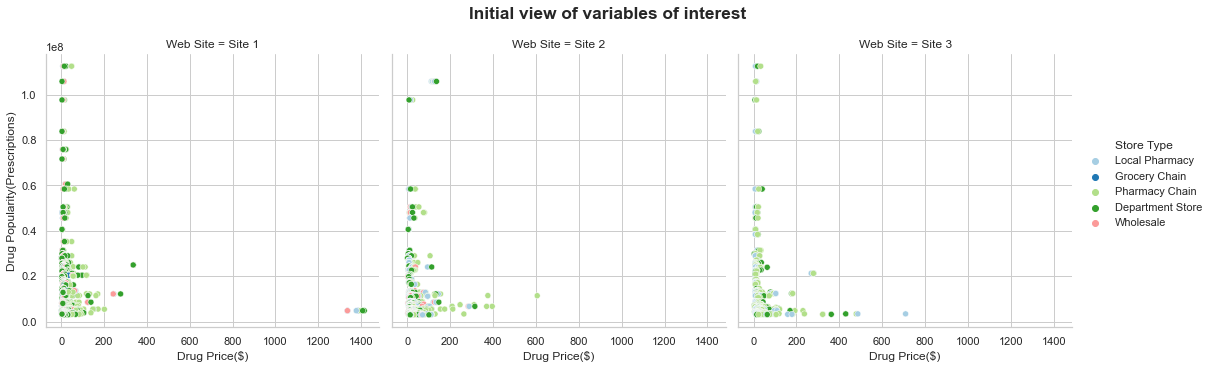

In [164]:
# Scatter plot for all data 
sns.set_style("whitegrid")
sns.set_palette("Paired")
fig1=sns.relplot(data=allSites, x="Price", y="Drug Popularity",col="Web Site",hue="Store Type")
fig1.fig.suptitle("Initial view of variables of interest" , 
               fontsize = 'x-large' ,  
               fontweight = 'bold' ) 
  
fig1.fig.subplots_adjust( top = 0.85 ) 
fig1.set_axis_labels( "Drug Price($)" , "Drug Popularity(Prescriptions)" )

In [121]:
print(site1.describe())
print(site2.describe())
print(site3.describe())

             Price  Prescription Rank  Drug Popularity
count  1540.000000        1540.000000     1.540000e+03
mean     31.207013          93.898052     1.489922e+07
std     115.204267          55.385207     1.890621e+07
min       0.570000           0.000000     2.954414e+06
25%       9.000000          46.000000     4.960255e+06
50%      12.690000          92.000000     8.139836e+06
75%      20.600000         138.000000     1.706464e+07
max    1414.190000         197.000000     1.124740e+08
         Quantity       Price  Prescription Rank  Drug Popularity
count  817.000000  817.000000         817.000000     8.170000e+02
mean    55.116279   32.155116         100.052632     1.335574e+07
std     63.016648   48.640155          57.133130     1.668656e+07
min      1.000000    0.720000           1.000000     2.925875e+06
25%     30.000000    9.770000          55.000000     4.115042e+06
50%     30.000000   15.310000         100.000000     7.406248e+06
75%     90.000000   32.230000         151.0

Text(0.5, 1.0, 'Price less than $400')

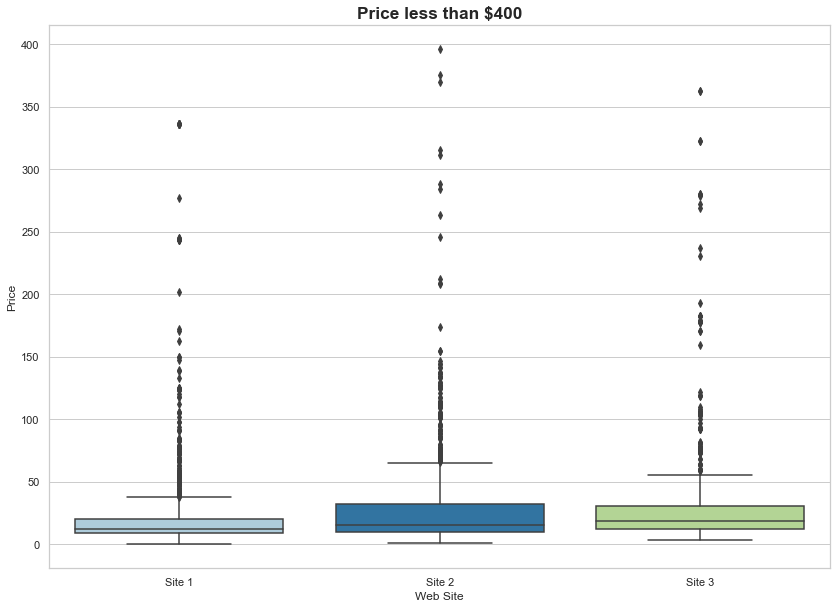

In [165]:
#box plot to observe price behavior
allSites_modified=allSites[(allSites["Price"]<400)] #2% lost
sns.set_style("whitegrid")
sns.set_palette("Paired")
fig2=sns.boxplot(x="Web Site", y="Price", data=allSites_modified)
fig2.set_title("Price less than $400" , 
               fontsize = 'x-large' ,  
               fontweight = 'bold' )

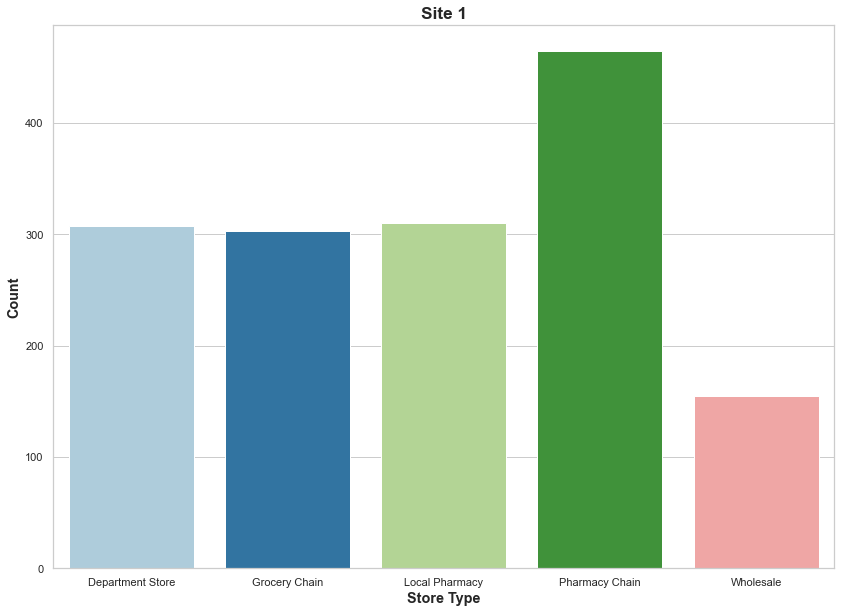

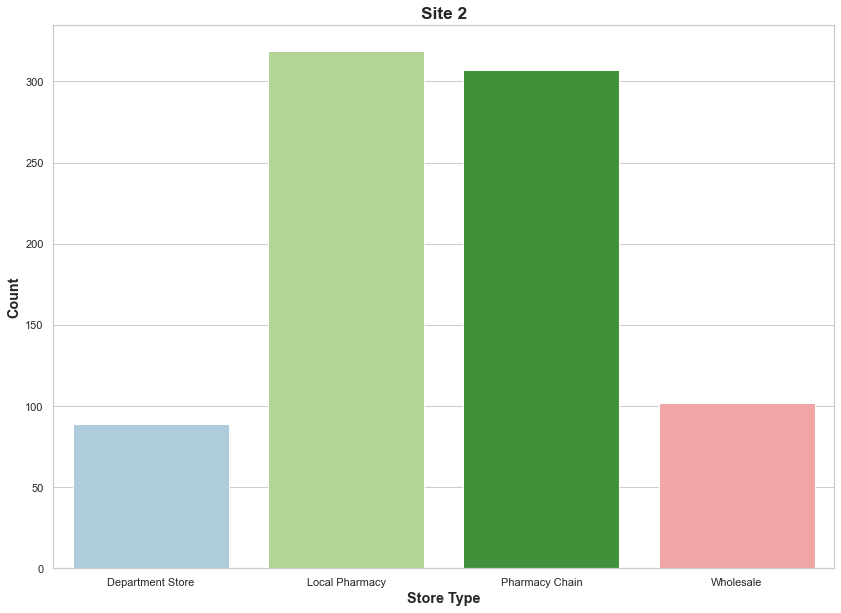

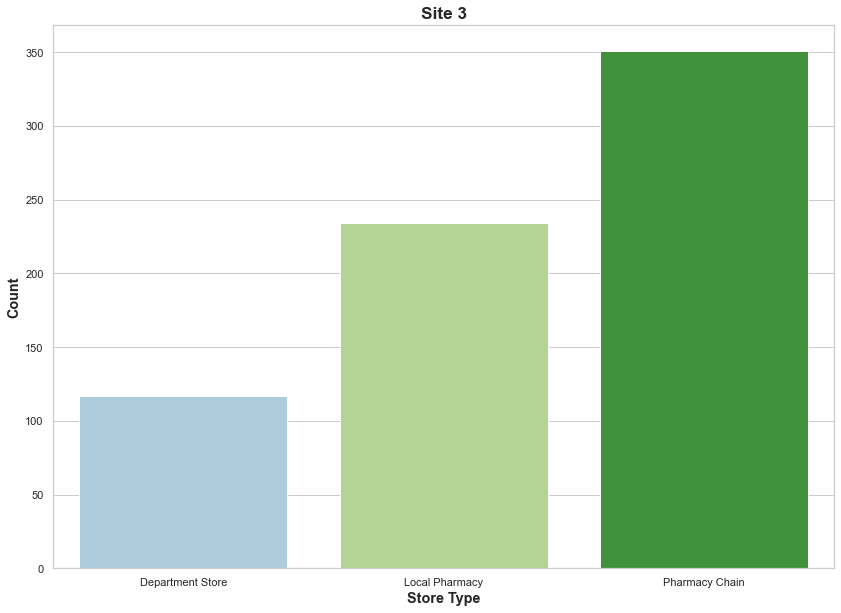

In [284]:
#build color palette
site1_storeTypes=site1.groupby("Store Type").count()['Price']
sns.set_style("whitegrid")
sns.set_palette("Paired")
fig3=sns.barplot(x=site1_storeTypes.index, y=site1_storeTypes, 
                 palette=store_type_color_palette(site1_storeTypes.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig3)
site2_storeTypes=site2.groupby("Store Type").count()['Price']
sns.set_style("whitegrid")
sns.set_palette("Paired")
fig4=sns.barplot(x=site2_storeTypes.index, y=site2_storeTypes,
                 palette=store_type_color_palette(site2_storeTypes.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig4)
site3_storeTypes=site3.groupby("Store Type").count()['Price']
sns.set_style("whitegrid")
sns.set_palette("Paired")
fig5=sns.barplot(x=site3_storeTypes.index, y=site3_storeTypes,
                 palette=store_type_color_palette(site3_storeTypes.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 3",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig5)

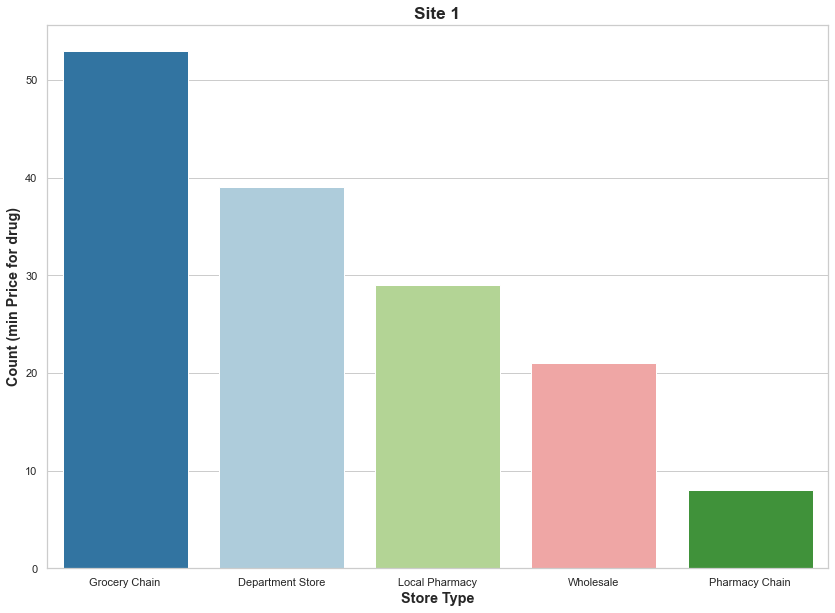

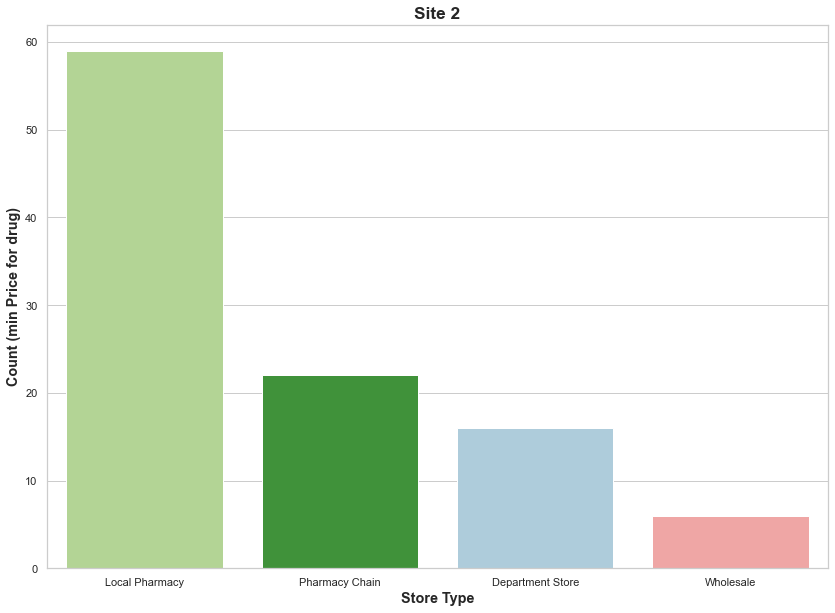

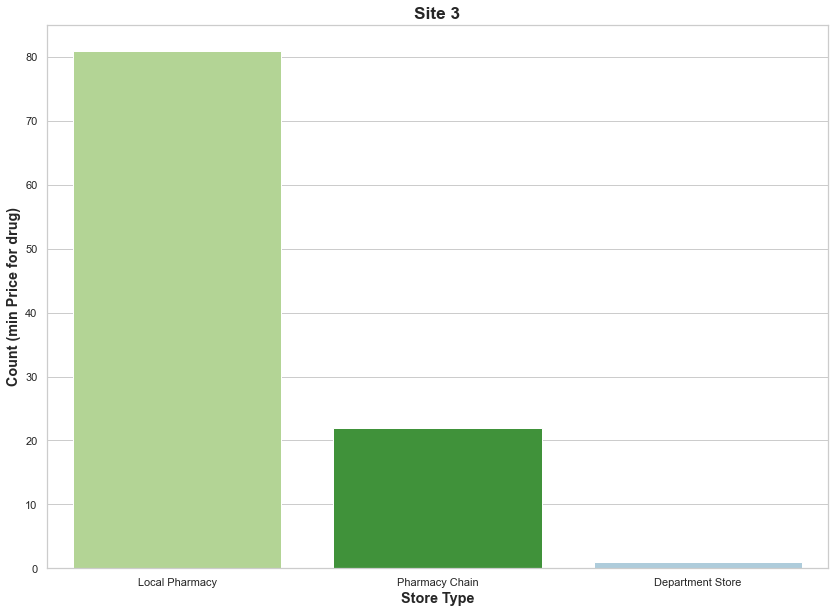

In [286]:
# which store types have the lowest prices
min_price_site1=min_within_group(site1)
sns.set_style("whitegrid")
sns.set_palette("Paired")
fig6=sns.barplot(x=min_price_site1.index, y=min_price_site1,
                 palette=store_type_color_palette(min_price_site1.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count (min Price for drug)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig6)
# who store types tend to have the lowest prices in site 2
min_price_site2=min_within_group(site2)
fig7=sns.barplot(x=min_price_site2.index, y=min_price_site2,
                palette=store_type_color_palette(min_price_site2.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count (min Price for drug)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig7)
# who store types tend to have the lowest prices in site 3
min_price_site3=min_within_group(site3)
fig8=sns.barplot(x=min_price_site3.index, y=min_price_site3,
                 palette=store_type_color_palette(min_price_site3.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count (min Price for drug)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 3",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig8)

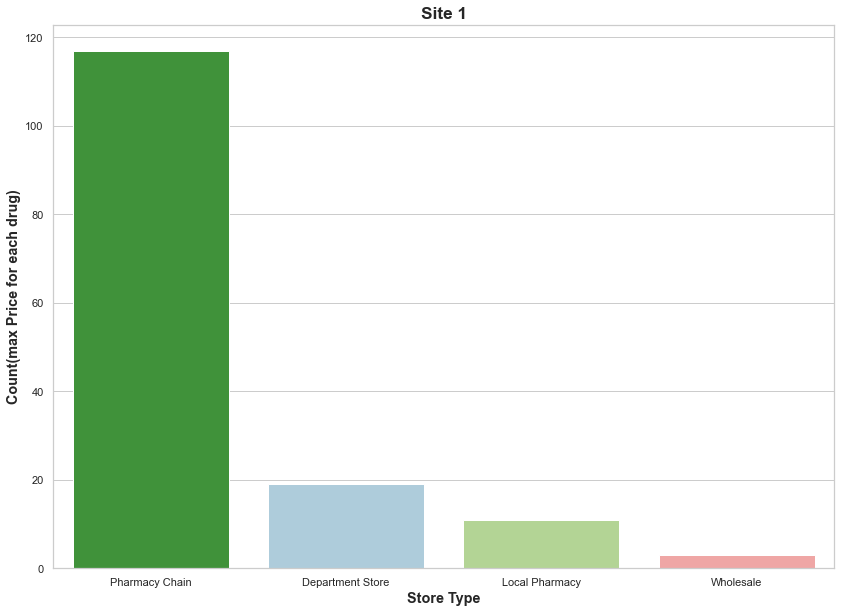

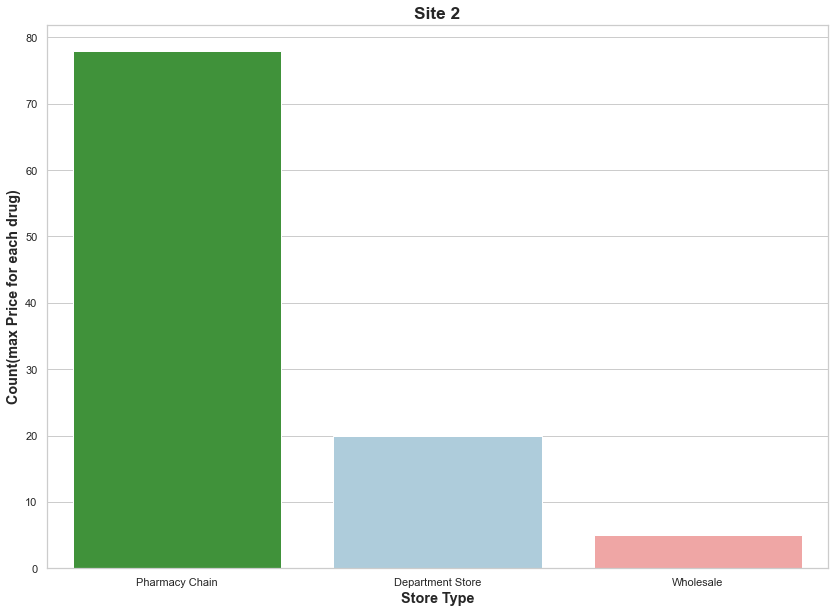

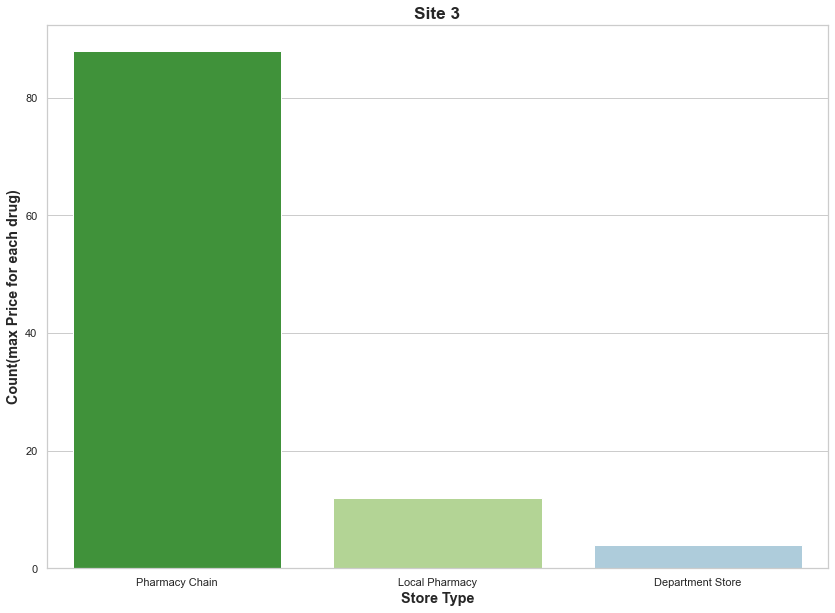

In [288]:
#which store types tend to have the maximum prices
max_price_site1=max_within_group(site1)
max_price_site2=max_within_group(site2)
max_price_site3=max_within_group(site3)

sns.set_style("whitegrid")
sns.set_palette("Paired")
fig9=sns.barplot(x=max_price_site1.index, y=max_price_site1,
                 palette=store_type_color_palette(max_price_site1.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count(max Price for each drug)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig9)
fig10=sns.barplot(x=max_price_site2.index, y=max_price_site2,
                 palette=store_type_color_palette(max_price_site2.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count(max Price for each drug)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig10)
fig11=sns.barplot(x=max_price_site3.index, y=max_price_site3,
                 palette=store_type_color_palette(max_price_site3.index))
plt.xlabel("Store Type",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count(max Price for each drug)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 3",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig11)


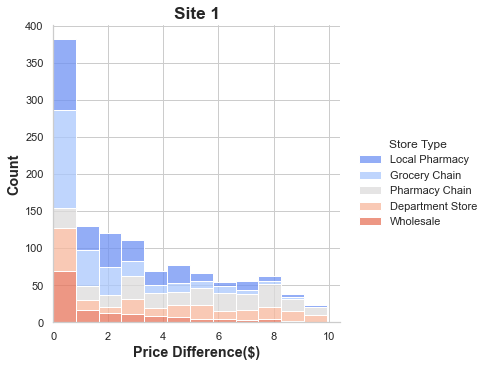

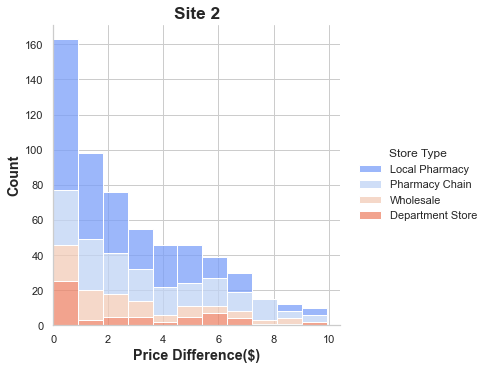

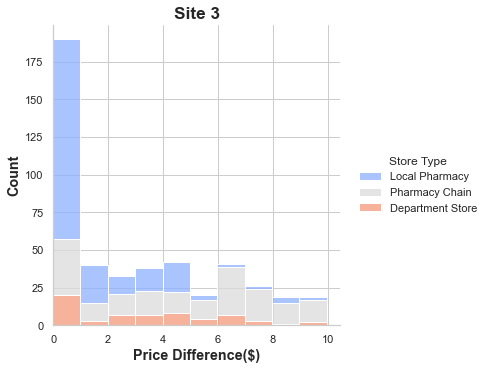

In [351]:
#Distribution or price after subtraction from min
site1_with_min=site1.join(site1.groupby('Drug name')['Price'].agg(['min']), on='Drug name')
site1['Price Difference']=site1['Price']-site1_with_min['min']
shrink_site1=site1[site1['Price Difference']<10]
sns.set_style("whitegrid")
fig12=sns.displot(data=site1, x=shrink_site1['Price Difference'], hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig12)

#Distribution or price after subtraction from min site 2
site2_with_min=site2.join(site2.groupby('Drug name')['Price'].agg(['min']), on='Drug name')
site2['Price Difference']=site2['Price']-site2_with_min['min']
shrink_site2=site2[site2['Price Difference']<10]
fig13=sns.displot(data=shrink_site2, x=shrink_site2['Price Difference'], hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig13)

#Distribution or price after subtraction from min site 3
site3_with_min=site3.join(site3.groupby('Drug name')['Price'].agg(['min']), on='Drug name')
site3['Price Difference']=site3['Price']-site3_with_min['min']
shrink_site3=site3[site3['Price Difference']<10]
fig14=sns.displot(data=shrink_site3, x=shrink_site3['Price Difference'], hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 3",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig14)

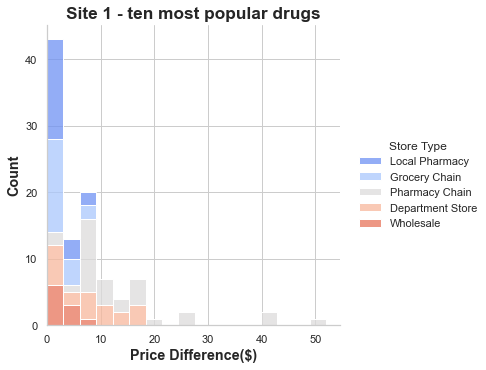

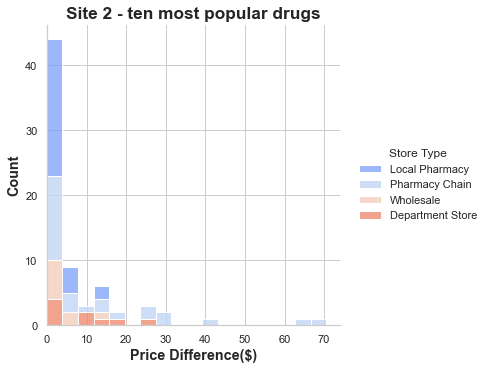

In [368]:
#top ten presciprtions
top_ten=site1[site1['Prescription Rank'].astype(int)<10]
fig15=sns.displot(data=top_ten, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1 - ten most popular drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig15)
top_ten_site2=site2[site2['Prescription Rank'].astype(int)<18]
fig16=sns.displot(data=top_ten_site2, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2 - ten most popular drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig16)

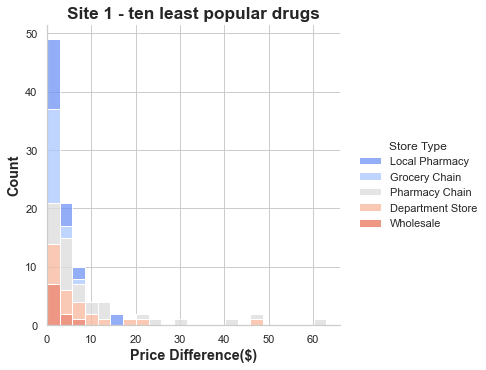

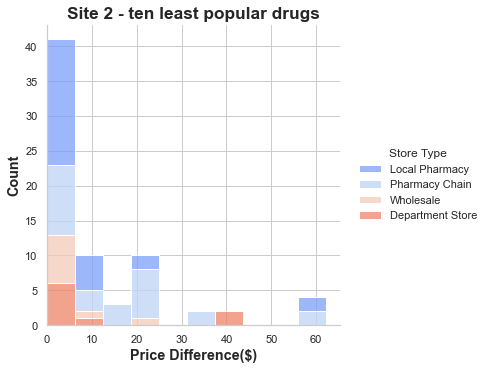

In [370]:
#bottom ten prescriptions
bottom_ten=site1[site1['Prescription Rank'].astype(int)>182]
fig17=sns.displot(data=bottom_ten, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1 - ten least popular drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig17)
bottom_ten_site2=site2[site2['Prescription Rank'].astype(int)>182]
fig18=sns.displot(data=bottom_ten_site2, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2 - ten least popular drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig18)

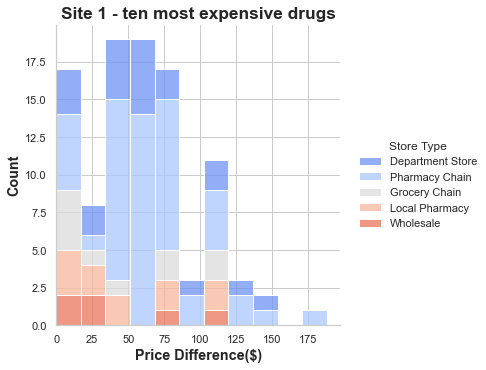

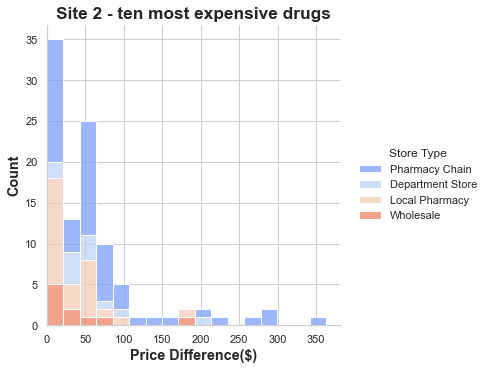

In [371]:
#most expensive presciprtions
most_expensive=site1.sort_values("Price",ascending=False).iloc[:100,:]
fig19=sns.displot(data=most_expensive, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1 - ten most expensive drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig19)
most_expensive_site2=site2.sort_values("Price",ascending=False).iloc[:100,:]
fig20=sns.displot(data=most_expensive_site2, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2 - ten most expensive drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig20)

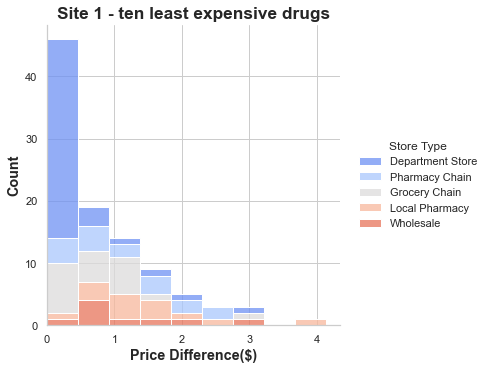

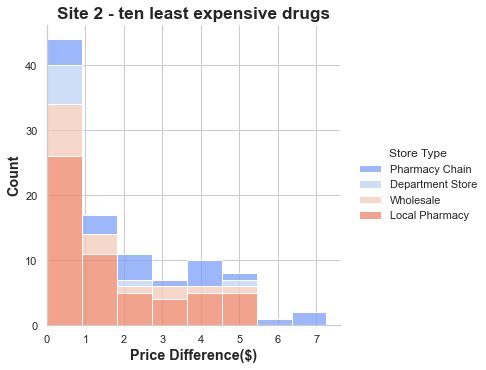

In [372]:
least_expensive=site1.sort_values("Price").iloc[:100,:]
fig21=sns.displot(data=least_expensive, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 1 - ten least expensive drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig21)
least_expensive_site2=site2.sort_values("Price").iloc[:100,:]
fig22=sns.displot(data=least_expensive_site2, x='Price Difference', hue="Store Type", multiple="stack",palette="coolwarm").set(xlim=(0))
plt.xlabel("Price Difference($)",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.ylabel("Count",fontdict={'fontsize':"large",'fontweight':"bold"})
plt.title("Site 2 - ten least expensive drugs",fontdict={'fontsize':"x-large",'fontweight':"bold" }) # You can comment this line out if you don't need title
plt.show(fig22)